# Secret Whiteboard

## Team Members

Fenno Boomgaarden (Fach-Bachelor Informatik)

Hauke Redemann (Fach-Bachelor Informatik)

Keno Rott (Fach-Bachelor Informatik)

# Use cases

## Privacy in real-life video streaming

- In common screen-capturing softwares like OBS it is possible to select which windows with non-sensitive information are captured.

- Streaming in real-life **has no mechanisms** like that.

- The only option to protect the personal information of the streamer and/or others is **image processing**.

- Hide sensitive information while streaming on platforms like YouTube and Twitch.

For example a streamer shows his/her appartment to his/her viewers and (s)he has some sensitive information on the kitchen fridge (s)he wants to hide.

## Implementation as a standard in camera apps

- A standard has already been established when it comes to shutter sounds.

- Most camera apps already disallow disabling the shutter sound to protect others from being captured without permission.

- Establish a new standard to protect sensitive data on digital images.

- A special pattern around objects/text hides parts of the image.

# Project Milestones

## 1. Preprocessing

![preprocessing](https://github.com/uol-mediaprocessing/group-projects-secret-whiteboard/raw/master/img/sample1_preprocessing.png)

Differentiate the drawing from the whiteboard background and filter out light reflections etc.

- Thresholding (https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html)

- Erosion/Dilatation (https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html)

## 2. Pattern detection

![pattern detection](https://github.com/uol-mediaprocessing/group-projects-secret-whiteboard/raw/master/img/sample1_pattern_detection.png)

Detect corner patterns of the area as nodes, connect the nodes if there is a line in between.

- Hough Circle Transform (https://docs.opencv.org/master/da/d53/tutorial_py_houghcircles.html)

- Hough Line Transform (https://docs.opencv.org/master/d6/d10/tutorial_py_houghlines.html)

- Feature Matching (https://docs.opencv.org/master/db/d27/tutorial_py_table_of_contents_feature2d.html)

## 3. Image manipulation

![image manipulation](https://github.com/uol-mediaprocessing/group-projects-secret-whiteboard/raw/master/img/sample1_image_manipulation.png)

Draw and fill out a polygon shape based on the recognized nodes.

- Drawing Functions (https://docs.opencv.org/master/dc/da5/tutorial_py_drawing_functions.html)

## 4. Support full video streams

![motion detection](https://github.com/uol-mediaprocessing/group-projects-secret-whiteboard/raw/master/img/sample1_video_streams.png)

Feature matching might be too slow -> Use feature matching on a single frame and calculate the differences in movement.

Use deep learning if applicable.

- Object Tracking (https://docs.opencv.org/master/d7/d00/tutorial_meanshift.html)

- Deep Learning (https://docs.opencv.org/master/d6/de2/tutorial_py_table_of_contents_ml.html)

# First code

In [2]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
import urllib.request

with urllib.request.urlopen("https://drive.google.com/uc?export=download&id=14jKA86lYeBaqBL1hqnqc3AfKnMV9qA0l") as url:
    s = url.read()

arr = np.asarray(bytearray(s), dtype=np.uint8)
img = cv2.imdecode(arr, 0)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [8]:
img2 = cv2.medianBlur(img,7)

ret,th1 = cv2.threshold(img2,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

images = [img, th1, th2, th3]

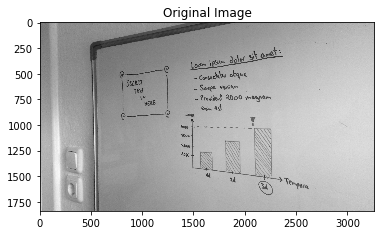

In [4]:
plt.imshow(images[0], 'gray')
plt.title('Original Image')
plt.show()

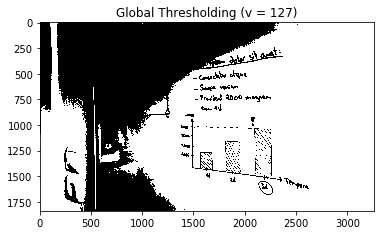

In [5]:
plt.imshow(images[1], 'gray')
plt.title('Global Thresholding (v = 127)')
plt.show()

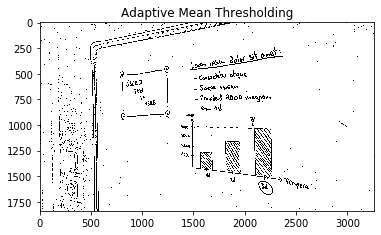

In [6]:
plt.imshow(images[2], 'gray')
plt.title('Adaptive Mean Thresholding')
plt.show()

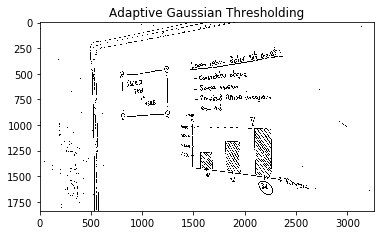

In [7]:
plt.imshow(images[3], 'gray')
plt.title('Adaptive Gaussian Thresholding')
plt.show()